Mean Squared Error: 53.51125000000006


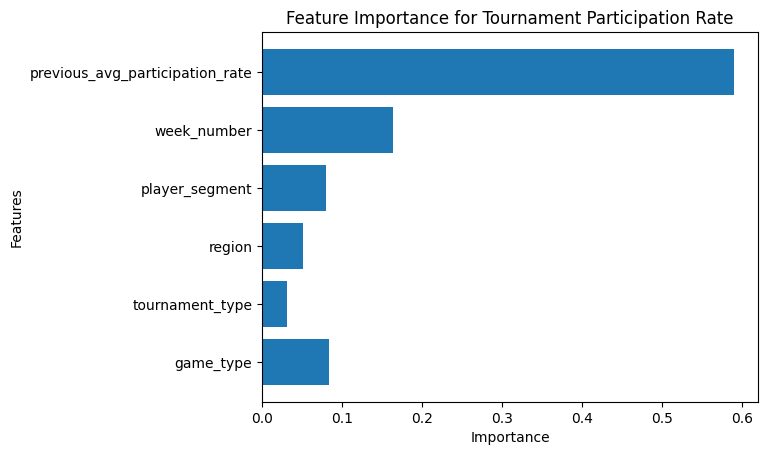

Feature Importances:
game_type: 0.08318593956600191
tournament_type: 0.0314693342830764
region: 0.050932645835131574
player_segment: 0.08031553644354404
week_number: 0.1639828041100148
previous_avg_participation_rate: 0.5901137397622314


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Sample data (replace with your actual dataset)
data = {
    'participation_rate': [80, 75, 60, 85, 90, 70, 65, 95, 92, 60],
    'game_type': ['Shooting', 'Shooting', 'Sports', 'Sports', 'Shooting', 'Shooting', 'Sports', 'Sports', 'Shooting', 'Sports'],
    'tournament_type': ['Solo', 'Team', 'Solo', 'Solo', 'Team', 'Team', 'Solo', 'Team', 'Solo', 'Team'],
    'region': ['North America', 'Europe', 'Asia', 'North America', 'Asia', 'North America', 'Europe', 'Asia', 'Europe', 'North America'],
    'player_segment': ['New', 'Core', 'Core', 'New', 'Core', 'New', 'Core', 'Core', 'New', 'Core'],
    'week_number': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'previous_avg_participation_rate': [80, 82, 85, 90, 87, 85, 83, 91, 88, 86]
}

df = pd.DataFrame(data)

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['game_type'] = label_encoder.fit_transform(df['game_type'])
df['tournament_type'] = label_encoder.fit_transform(df['tournament_type'])
df['region'] = label_encoder.fit_transform(df['region'])
df['player_segment'] = label_encoder.fit_transform(df['player_segment'])

# Features and target variable
X = df.drop('participation_rate', axis=1)  # Features
y = df['participation_rate']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature Importance (to identify key drivers)
feature_importance = model.feature_importances_
features = X.columns

# Plot feature importance
plt.barh(features, feature_importance)
plt.title('Feature Importance for Tournament Participation Rate')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Print feature importance
print("Feature Importances:")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance}")


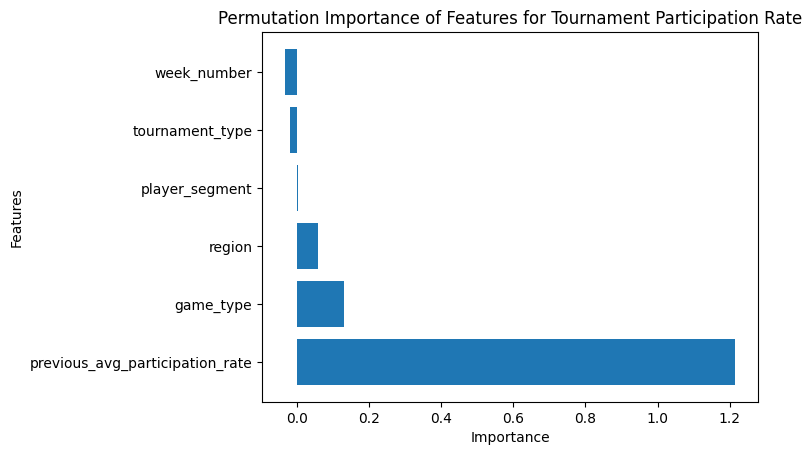

Contribution for game_type:
  0: 0.0
  1: 0.0


Contribution for tournament_type:
  0: 0.06543366213151931
  1: 0.10608689128943757


Contribution for region:
  2: 0.04158887323943652
  0: 0.042713571428571386
  1: 0.43938249642687016


Contribution for player_segment:
  1: 0.08126427828054293
  0: 0.18805638589234813




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Sample data (replace with your actual dataset)
data = {
    'participation_rate': [80, 75, 60, 85, 90, 70, 65, 95, 92, 60, 78, 74, 65, 88, 89, 72, 67, 96, 93, 62, 81, 77, 61, 86, 91, 68, 64, 94, 91, 59],
    'game_type': ['Shooting', 'Shooting', 'Sports', 'Sports', 'Shooting', 'Shooting', 'Sports', 'Sports', 'Shooting', 'Sports',
                  'Shooting', 'Shooting', 'Sports', 'Sports', 'Shooting', 'Shooting', 'Sports', 'Sports', 'Shooting', 'Sports',
                  'Shooting', 'Shooting', 'Sports', 'Sports', 'Shooting', 'Shooting', 'Sports', 'Sports', 'Shooting', 'Sports'],
    'tournament_type': ['Solo', 'Team', 'Solo', 'Solo', 'Team', 'Team', 'Solo', 'Team', 'Solo', 'Team', 'Solo', 'Team', 'Solo', 'Solo', 'Team', 'Solo', 'Team', 'Solo', 'Team', 'Solo',
                        'Solo', 'Team', 'Solo', 'Solo', 'Team', 'Solo', 'Team', 'Solo', 'Team', 'Solo'],
    'region': ['North America', 'Europe', 'Asia', 'North America', 'Asia', 'North America', 'Europe', 'Asia', 'Europe', 'North America',
               'North America', 'Europe', 'Asia', 'North America', 'Asia', 'North America', 'Europe', 'Asia', 'Europe', 'North America',
               'North America', 'Europe', 'Asia', 'North America', 'Asia', 'North America', 'Europe', 'Asia', 'Europe', 'North America'],
    'player_segment': ['New', 'Core', 'Core', 'New', 'Core', 'New', 'Core', 'Core', 'New', 'Core', 'Core', 'New', 'New', 'Core', 'New', 'New', 'Core', 'New', 'Core', 'New',
                       'Core', 'Core', 'New', 'New', 'Core', 'Core', 'New', 'Core', 'New', 'New'],
    'week_number': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'previous_avg_participation_rate': [80, 82, 85, 90, 87, 85, 83, 91, 88, 86, 79, 83, 85, 91, 86, 88, 84, 92, 89, 87, 80, 84, 82, 90, 93, 86, 87, 94, 91, 85]
}


df = pd.DataFrame(data)

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['game_type'] = label_encoder.fit_transform(df['game_type'])
df['tournament_type'] = label_encoder.fit_transform(df['tournament_type'])
df['region'] = label_encoder.fit_transform(df['region'])
df['player_segment'] = label_encoder.fit_transform(df['player_segment'])

# Features and target variable
X = df.drop('participation_rate', axis=1)  # Features
y = df['participation_rate']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Permutation Importance to see how each feature contributes to the model
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Extract feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
})

# Plot feature importance
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Permutation Importance of Features for Tournament Participation Rate')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Breakdown for categorical variables (Game Type, Tournament Type, etc.)
# For categorical variables, let's calculate their impact on participation individually.
def feature_contribution(model, X_train, y_train, feature_name):
    unique_categories = X_train[feature_name].unique()
    category_importance = {}

    for category in unique_categories:
        # Create a subset of data where the feature is equal to the current category
        X_subset = X_train[X_train[feature_name] == category]
        y_subset = y_train[X_train[feature_name] == category]

        # Train a model on this subset and calculate importance
        model.fit(X_subset, y_subset)
        perm_importance = permutation_importance(model, X_subset, y_subset, n_repeats=10, random_state=42)

        # Store the average importance for this category
        category_importance[category] = perm_importance.importances_mean[0]  # Mean importance across repetitions

    return category_importance

# Analyze contribution for each categorical feature
categorical_features = ['game_type', 'tournament_type', 'region', 'player_segment']
categorical_contributions = {}

for feature in categorical_features:
    categorical_contributions[feature] = feature_contribution(model, X_train, y_train, feature)

# Display the contributions
for feature, contrib in categorical_contributions.items():
    print(f"Contribution for {feature}:")
    for category, importance in contrib.items():
        print(f"  {category}: {importance}")
    print("\n")


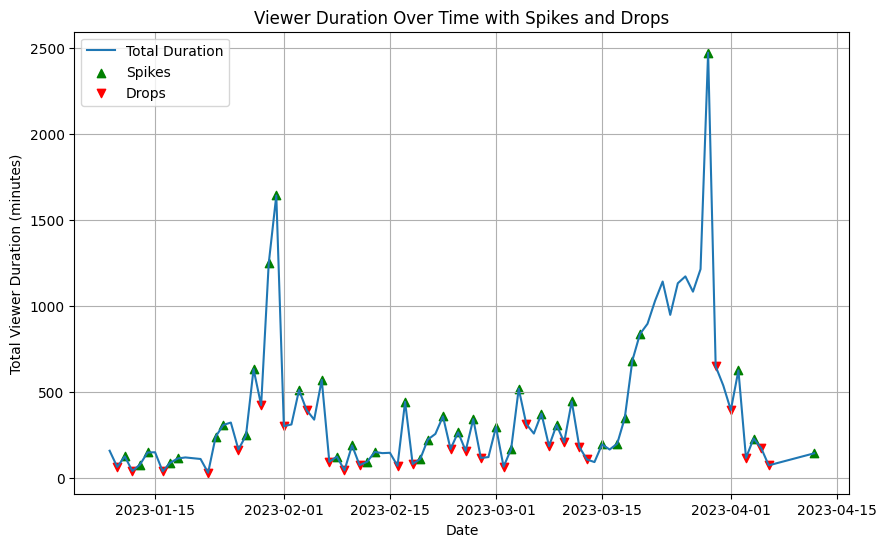

Spikes:
          date  total_duration  pct_change
2   2023-01-11             124   96.825397
4   2023-01-13              76   94.871795
5   2023-01-14             147   93.421053
8   2023-01-17              87  135.135135
9   2023-01-18             112   28.735632
13  2023-01-23             239  724.137931
14  2023-01-24             307   28.451883
17  2023-01-27             246   50.000000
18  2023-01-28             632  156.910569
20  2023-01-30            1247  195.497630
21  2023-01-31            1643   31.756215
24  2023-02-03             510   64.516129
27  2023-02-06             569   68.343195
29  2023-02-08             123   32.258065
31  2023-02-10             188  337.209302
33  2023-02-12              93   27.397260
34  2023-02-13             150   61.290323
38  2023-02-17             442  540.579710
40  2023-02-19             109   36.250000
41  2023-02-20             222  103.669725
43  2023-02-22             357   40.000000
45  2023-02-24             264   58.083832
47 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
dim_events = pd.read_csv("dim_events.csv")
fact_viewers = pd.read_csv("Fact_viewrs.csv")

# Convert date columns to datetime
fact_viewers['view_time'] = pd.to_datetime(fact_viewers['view_time'])

# Group data by date and calculate total viewer duration
viewers_duration = fact_viewers.groupby(fact_viewers['view_time'].dt.date)['duration_minutes'].sum().reset_index()
viewers_duration.rename(columns={"view_time": "date", "duration_minutes": "total_duration"}, inplace=True)

# Calculate percentage change
viewers_duration['pct_change'] = viewers_duration['total_duration'].pct_change() * 100

# Identify spikes and drops
spikes = viewers_duration[viewers_duration['pct_change'] > 20]  # Spike threshold: 20% increase
drops = viewers_duration[viewers_duration['pct_change'] < -20]  # Drop threshold: 20% decrease

# Plot the metric over time
plt.figure(figsize=(10, 6))
plt.plot(viewers_duration['date'], viewers_duration['total_duration'], label='Total Duration')
plt.scatter(spikes['date'], spikes['total_duration'], color='green', label='Spikes', marker='^')
plt.scatter(drops['date'], drops['total_duration'], color='red', label='Drops', marker='v')
plt.xlabel('Date')
plt.ylabel('Total Viewer Duration (minutes)')
plt.title('Viewer Duration Over Time with Spikes and Drops')
plt.legend()
plt.grid()
plt.show()

# Output spikes and drops
print("Spikes:")
print(spikes)
print("\nDrops:")
print(drops)


In [ ]:
import pandas as pd

# Load the CSV files into DataFrames
dim_events = pd.read_csv('dim_events.csv')
dim_games = pd.read_csv('dim_games.csv')
dim_users = pd.read_csv('dim_users.csv')
fact_gameplay = pd.read_csv('fact_gameplay.csv')
fact_user_activity = pd.read_csv('fact_user_activity.csv')
fact_viewers = pd.read_csv('fact_viewer.csv')

# Ensure date columns are parsed as datetime
dim_events['start_date'] = pd.to_datetime(dim_events['start_date'])
dim_events['end_date'] = pd.to_datetime(dim_events['end_date'])
fact_gameplay['play_date'] = pd.to_datetime(fact_gameplay['play_date'])
fact_user_activity['activity_date'] = pd.to_datetime(fact_user_activity['activity_date'])
fact_viewers['view_time'] = pd.to_datetime(fact_viewers['view_time'])


In [ ]:
# Merge fact_viewers with dim_events and dim_games to add context
merged_data = fact_viewers.merge(dim_events, on='event_id', how='left').merge(dim_games, on='game_id', how='left')

# Filter for the date of a spike or drop
spike_date = spikes['date'].iloc[0]  # Example: Use the first spike date
drop_date = drops['date'].iloc[0]   # Example: Use the first drop date

# Analyze the spike
spike_data = merged_data[merged_data['view_time'].dt.date == spike_date]
spike_grouped = spike_data.groupby(['event_type', 'platform'])['duration_minutes'].sum().reset_index()
spike_grouped.rename(columns={'duration_minutes': 'total_duration'}, inplace=True)
spike_grouped['percentage_contribution'] = (
    spike_grouped['total_duration'] / spike_grouped['total_duration'].sum() * 100
)

# Analyze the drop
drop_data = merged_data[merged_data['view_time'].dt.date == drop_date]
drop_grouped = drop_data.groupby(['event_type', 'platform'])['duration_minutes'].sum().reset_index()
drop_grouped.rename(columns={'duration_minutes': 'total_duration'}, inplace=True)
drop_grouped['percentage_contribution'] = (
    drop_grouped['total_duration'] / drop_grouped['total_duration'].sum() * 100
)

# Example: Explanation for spike
print(f"Spike on {spike_date}:")
for _, row in spike_grouped.iterrows():
    print(
        f"Event Type: {row['event_type']}, Platform: {row['platform']} contributed "
        f"{row['percentage_contribution']:.2f}% to the total duration."
    )

# Example: Explanation for drop
print(f"\nDrop on {drop_date}:")
for _, row in drop_grouped.iterrows():
    print(
        f"Event Type: {row['event_type']}, Platform: {row['platform']} contributed "
        f"{row['percentage_contribution']:.2f}% to the total duration."
    )


Spike on 2023-01-11:
Event Type: League, Platform: PC,Mobile,Xbox contributed 32.26% to the total duration.
Event Type: League, Platform: PC,PlayStation,Xbox contributed 67.74% to the total duration.

Drop on 2023-01-10:
Event Type: League, Platform: PC,Mobile,Xbox contributed 100.00% to the total duration.


In [ ]:
dimensions = ['event_type', 'platform', 'genre', 'developer', 'game_name']
contributions = {}

for dimension in dimensions:
    grouped = (
        merged_data.groupby(dimension)['duration_minutes']
        .sum()
        .reset_index()
        .sort_values(by='duration_minutes', ascending=False)
    )
    grouped['percentage_contribution'] = (
        grouped['duration_minutes'] / grouped['duration_minutes'].sum() * 100
    )
    contributions[dimension] = grouped

# Display contributions for each dimension
for dimension, data in contributions.items():
    print(f"\nContribution Analysis for {dimension}:\n")
    for _, row in data.iterrows():
        print(
            f"{dimension.capitalize()}: {row[dimension]} contributed "
            f"{row['percentage_contribution']:.2f}% ({row['duration_minutes']} minutes)"
        )


Contribution Analysis for event_type:

Event_type: Tournament contributed 52.14% (16990 minutes)
Event_type: League contributed 47.86% (15597 minutes)

Contribution Analysis for platform:

Platform: PC,PlayStation,Xbox contributed 43.36% (14129 minutes)
Platform: Switch contributed 24.89% (8110 minutes)
Platform: PC,PlayStation,Xbox,Switch contributed 24.10% (7855 minutes)
Platform: PC,Mobile,Xbox contributed 5.86% (1911 minutes)
Platform: PC contributed 1.79% (582 minutes)

Contribution Analysis for genre:

Genre: Fighting contributed 24.89% (8110 minutes)
Genre: FPS contributed 20.12% (6555 minutes)
Genre: MOBA contributed 17.68% (5763 minutes)
Genre: Battle Royale contributed 15.68% (5109 minutes)
Genre: Action RPG contributed 13.43% (4376 minutes)
Genre: Sports contributed 6.42% (2092 minutes)
Genre: MMORPG contributed 1.79% (582 minutes)

Contribution Analysis for developer:

Developer: Nintendo contributed 24.89% (8110 minutes)
Developer: Ubisoft contributed 20.12% (6555 minutes

In [ ]:
import pandas as pd

# Load the CSV files into DataFrames
dim_events = pd.read_csv('dim_events.csv')
dim_games = pd.read_csv('dim_games.csv')
dim_users = pd.read_csv('dim_users.csv')
fact_gameplay = pd.read_csv('fact_gameplay.csv')
fact_user_activity = pd.read_csv('fact_user_activity.csv')
fact_viewers = pd.read_csv('fact_viewer.csv')

# Ensure date columns are parsed as datetime
dim_events['start_date'] = pd.to_datetime(dim_events['start_date'])
dim_events['end_date'] = pd.to_datetime(dim_events['end_date'])
fact_gameplay['play_date'] = pd.to_datetime(fact_gameplay['play_date'])
fact_user_activity['activity_date'] = pd.to_datetime(fact_user_activity['activity_date'])
fact_viewers['view_time'] = pd.to_datetime(fact_viewers['view_time'])

# Rename overlapping columns in dim_users
dim_users.rename(columns={'platform': 'user_platform'}, inplace=True)

# Merging datasets step by step
# Merge fact_viewers with dim_events
merged_data = pd.merge(fact_viewers, dim_events, on='event_id', how='left', suffixes=('', ''))

# Merge merged_data with dim_games
merged_data = pd.merge(merged_data, dim_games, on='game_id', how='left', suffixes=('', ''))

# Merge merged_data with dim_users (with renamed 'platform')
merged_data = pd.merge(merged_data, dim_users, on='user_id', how='left', suffixes=('', ''))

# Merge with fact_gameplay on 'game_id' and 'user_id' with suffixes for overlapping columns
merged_data = pd.merge(merged_data, fact_gameplay, on=['game_id', 'user_id'], how='left', suffixes=('_merged', '_gameplay'))

# Merge with fact_user_activity on 'user_id' and 'event_id'
merged_data = pd.merge(merged_data, fact_user_activity, on=['user_id', 'event_id'], how='left', suffixes=('', '_activity'))

# Drop duplicate columns (if any) from the merged data
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

# Check the final merged data
print(merged_data.head())


KeyError: 'event_id'